In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
x_test[0].shape

(32, 32, 3)

In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [8]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(3, 3, activation="relu")
    self.flatten = Flatten()
    self.d1 = Dense(128, activation="relu")
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return x

model = MyModel()

In [9]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimiser = tf.keras.optimizers.Adam()

In [10]:
train_loss = tf.keras.metrics.Mean()
test_loss = tf.keras.metrics.Mean()

train_accuracy = tf.keras.metrics.SparseCategoricalCrossentropy()
test_accuracy = tf.keras.metrics.SparseCategoricalCrossentropy()

In [11]:
@tf.function
def train(images, labels):
  with tf.GradientTape() as tape:
    pred = model(images)
    loss = loss_function(labels, pred)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimiser.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, pred)


In [12]:
@tf.function
def test(images, labels):
  pred = model(images)
  loss = loss_function(labels, pred)

  test_loss(loss)
  test_accuracy(labels, pred)

In [13]:
epochs = 5

for epoch in range(epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
  #train
    for images, labels in train_dataset:
      train(images, labels)

    #test
    for images, labels in test_dataset:
      test(images, labels)


    print("epoch:", epoch + 1,
          f"Train loss: {train_loss.result()}",
          f"Train accuracy: {train_accuracy.result()}",
          f"Test loss: {test_loss.result()}",
          f"test accuracy: {test_accuracy.result()}")



epoch: 1 Train loss: 1.8051214218139648 Train accuracy: 4.728316307067871 Test loss: 1.6866633892059326 test accuracy: 4.678383827209473
epoch: 2 Train loss: 1.6428214311599731 Train accuracy: 4.428423881530762 Test loss: 1.6192103624343872 test accuracy: 3.9231081008911133
epoch: 3 Train loss: 1.5423355102539062 Train accuracy: 3.84543776512146 Test loss: 1.5207515954971313 test accuracy: 3.4681618213653564
epoch: 4 Train loss: 1.4400385618209839 Train accuracy: 3.2264974117279053 Test loss: 1.4627463817596436 test accuracy: 3.4083333015441895
epoch: 5 Train loss: 1.3837125301361084 Train accuracy: 3.0248146057128906 Test loss: 1.4673306941986084 test accuracy: 3.352954387664795


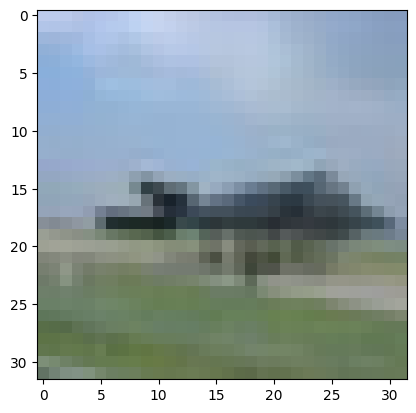

In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_train[600])

In [27]:
import cv2
import numpy as np

img = cv2.imread("/content/airplan.png")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (32, 32))
# img = img[..., tf.newaxis]
img = img[tf.newaxis, ...]
img = img.astype("float32")

pred = model(img)
result = np.argmax(pred)
result

0

In [28]:
if result == 0:
    print("airplanes")
elif result == 1:
    print("cars")
elif result == 2:
    print("birds")
elif result == 3:
    print("cats")
elif result == 4:
    print("deer")
elif result == 5:
    print("dogs")
elif result == 6:
    print("frogs")
elif result == 7:
    print("horses")
elif result == 8:
    print("ships")
elif result == 9:
    print("trucks")




airplanes


In [29]:
model.save("My_Model")

In [30]:
model = tf.keras.models.load_model("/content/My_Model")